In [1]:
from mlswarm.mlswarm import neuralnet 

#DATASET-------------------------------
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples = 2000, noise=0.2, random_state=100)
Y = Y.reshape((Y.shape[0],1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)

In [2]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 5, "activation": "step"},
    {"input_dim": 5, "output_dim": 10, "activation": "step"},
    {"input_dim": 10, "output_dim": 5, "activation": "step"},
    {"input_dim": 5, "output_dim": 1, "activation": "step"},
]

#CREATE NEURAL NETWORK
nn1 = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 150 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn1.init_cloud(N = 150)

In [3]:
nn1.train(X_train,Y_train, {'max_epochs':300,
                            'cost_type': 'error_classification',
                            'learning_rate': 0.5,
                            'var_epsilon': 0.001,
                            'kernel_a': 0.1,
                            'alpha_rate': 5,
                            'gamma':0,
                            'verbose': True})
#TRAINING
#nn1.train(X = X_train, Y = Y_train, 
#          method = "swarm_derivfree", 
#          max_epochs= 300, n_batches = 1, batch_size = X_train.shape[0],
#          learning_rate = 0.5, var_epsilon = 0.001,
#          cost_type = "rmse",
#          kernel_a = 0.01, alpha_init = 0, alpha_rate = 1, beta = 0, gamma = 2, 
#          verbose = True)


Training started...
Iteration: 00000 - Cloud mean cost: 0.50750 - Cloud variance: 0.46757
Iteration: 00001 - Cloud mean cost: 0.50750 - Cloud variance: 0.55118
Iteration: 00002 - Cloud mean cost: 0.50750 - Cloud variance: 0.62687
Iteration: 00003 - Cloud mean cost: 0.50750 - Cloud variance: 0.69287
Iteration: 00004 - Cloud mean cost: 0.50750 - Cloud variance: 0.74859
Iteration: 00005 - Cloud mean cost: 0.50750 - Cloud variance: 0.79300
Iteration: 00006 - Cloud mean cost: 0.50750 - Cloud variance: 0.82596
Iteration: 00007 - Cloud mean cost: 0.50750 - Cloud variance: 0.84852
Iteration: 00008 - Cloud mean cost: 0.47500 - Cloud variance: 0.86138
Iteration: 00009 - Cloud mean cost: 0.47250 - Cloud variance: 0.86606
Iteration: 00010 - Cloud mean cost: 0.62187 - Cloud variance: 0.86378
Iteration: 00011 - Cloud mean cost: 0.61625 - Cloud variance: 0.85504
Iteration: 00012 - Cloud mean cost: 0.65250 - Cloud variance: 0.84151
Iteration: 00013 - Cloud mean cost: 0.74062 - Cloud variance: 0.82457

Iteration: 00117 - Cloud mean cost: 0.15125 - Cloud variance: 0.03897
Iteration: 00118 - Cloud mean cost: 0.15125 - Cloud variance: 0.03833
Iteration: 00119 - Cloud mean cost: 0.15000 - Cloud variance: 0.03766
Iteration: 00120 - Cloud mean cost: 0.15000 - Cloud variance: 0.03705
Iteration: 00121 - Cloud mean cost: 0.14938 - Cloud variance: 0.03678
Iteration: 00122 - Cloud mean cost: 0.14938 - Cloud variance: 0.03604
Iteration: 00123 - Cloud mean cost: 0.15000 - Cloud variance: 0.03540
Iteration: 00124 - Cloud mean cost: 0.14938 - Cloud variance: 0.03485
Iteration: 00125 - Cloud mean cost: 0.14875 - Cloud variance: 0.03410
Iteration: 00126 - Cloud mean cost: 0.14875 - Cloud variance: 0.03362
Iteration: 00127 - Cloud mean cost: 0.14875 - Cloud variance: 0.03290
Iteration: 00128 - Cloud mean cost: 0.14938 - Cloud variance: 0.03224
Iteration: 00129 - Cloud mean cost: 0.14625 - Cloud variance: 0.03167
Iteration: 00130 - Cloud mean cost: 0.14625 - Cloud variance: 0.03173
Iteration: 00131 - C

Iteration: 00235 - Cloud mean cost: 0.04625 - Cloud variance: 0.00545
Iteration: 00236 - Cloud mean cost: 0.04688 - Cloud variance: 0.00540
Iteration: 00237 - Cloud mean cost: 0.04688 - Cloud variance: 0.00533
Iteration: 00238 - Cloud mean cost: 0.04688 - Cloud variance: 0.00528
Iteration: 00239 - Cloud mean cost: 0.04688 - Cloud variance: 0.00524
Iteration: 00240 - Cloud mean cost: 0.04688 - Cloud variance: 0.00518
Iteration: 00241 - Cloud mean cost: 0.04688 - Cloud variance: 0.00514
Iteration: 00242 - Cloud mean cost: 0.04688 - Cloud variance: 0.00509
Iteration: 00243 - Cloud mean cost: 0.04500 - Cloud variance: 0.00504
Iteration: 00244 - Cloud mean cost: 0.04500 - Cloud variance: 0.00500
Iteration: 00245 - Cloud mean cost: 0.04563 - Cloud variance: 0.00496
Iteration: 00246 - Cloud mean cost: 0.04563 - Cloud variance: 0.00528
Iteration: 00247 - Cloud mean cost: 0.04625 - Cloud variance: 0.00471
Iteration: 00248 - Cloud mean cost: 0.04500 - Cloud variance: 0.00494
Iteration: 00249 - C

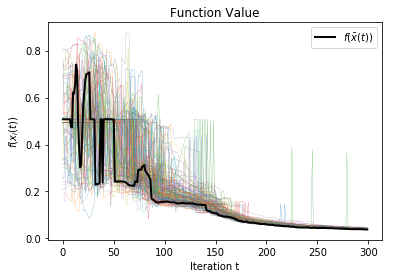

Test set accuracy using neuralnet 0: 0.93500
Test set accuracy using cloud mean: 0.93250


In [4]:
#PLOT COST HISTORY
nn1.plot_cost_history()

#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn1.prediction_accuracy_particle(X_test, Y_test, acc_type = "binary_accuracy", particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn1.prediction_accuracy_mean_particle(X_test, Y_test, acc_type = "binary_accuracy")

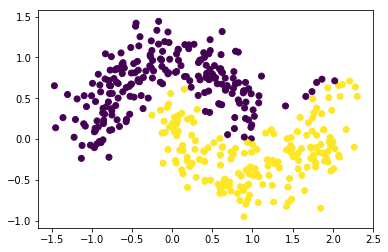

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

#CLASSIFICATION VISUALIZED
Y_test_hat = nn1.forward_propagation(X_test, cloud = nn1.cloud_mean)
plt.scatter(X_test[:,0],X_test[:,1], c = Y_test_hat.flatten())